# Data Preprocessing

In [1]:
# Lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score


In [2]:
# Load data xlsx
df1 = pd.read_excel('Book1.xlsx')
df1

,Dates,IHSG,Dow Jones Industrial Index,Batubara (Newcastle Coal),Minyak Mentah Global (WTI Oil ),Emas (XAU/USD),Minyak Sawit (Crude Palm Oil),Nilai Tukar Rupiah terhadap USD (USD/IDR),Suku Bunga Acuan Bank Sentral BI 7DRR (%),Suku Bunga Acuan Bank Sentral US Fed Fund Rate,Yield SUN 10Y,Credit Default Swap SUN 5Y,Dollar Index (DXY),Purchasing Manager Index (PMI) Indonesia,Purchasing Manager Index (PMI) US,Cadangan Devisa Indonesia (Milyar USD),Trade Balance Indonesia (Juta USD),Inflasi Indonesia,Inflasi US
0,2024-04-30,7234.197,37815.92,142.25,81.93,2294.79,3862,16259,6.25,5.5,7.218,75.546,106.221,52.9,50.0,136.2000,3558.5,3.00,3.4
1,2024-03-29,7288.813,39807.37,129.10,82.42,2229.87,4325,15857,6.00,5.5,6.693,72.424,104.487,54.2,51.9,140.3895,4577.7,3.05,3.5
2,2024-02-29,7316.111,38996.39,131.00,76.81,2045.74,4025,15719,6.00,5.5,6.593,71.140,104.156,52.7,52.2,144.0400,833.5,2.75,3.2
3,2024-01-31,7207.941,38150.30,116.50,75.35,2049.69,3814,15783,6.00,5.5,6.572,74.402,103.274,52.9,50.7,145.0516,1999.6,2.57,3.1
4,2023-12-29,7272.797,37689.54,146.40,72.12,2062.98,3662,15399,6.00,5.5,6.454,71.995,101.333,52.2,47.9,146.3838,3285.0,2.61,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2004-04-30,783.413,10225.57,NaN,NaN,389.30,1974,8705,NaN,1.0,10.878,NaN,90.480,NaN,NaN,37.0807,1725.4,5.92,2.3
241,2004-03-31,735.677,10357.70,NaN,NaN,425.10,1980,8564,NaN,1.0,11.548,NaN,87.610,NaN,NaN,37.4192,1617.2,5.11,1.7
242,2004-02-27,761.081,10583.92,NaN,NaN,397.00,1960,8453,NaN,1.0,11.790,NaN,87.310,NaN,NaN,36.0007,1518.3,4.60,1.7
243,2004-01-30,752.932,10488.07,NaN,NaN,401.20,1806,8457,NaN,1.0,12.734,NaN,87.200,NaN,NaN,35.9754,1700.2,4.82,1.9


In [3]:
# Making columns names lowercase and connecting with underscore
df1.columns = df1.columns.str.lower()
df1.columns = df1.columns.str.replace(' ', '_')
df1

,dates,ihsg,dow_jones_industrial_index,batubara_(newcastle_coal),minyak_mentah_global_(wti_oil_),emas_(xau/usd),minyak_sawit_(crude_palm_oil),nilai_tukar_rupiah_terhadap_usd_(usd/idr),suku_bunga_acuan_bank_sentral_bi_7drr_(%),suku_bunga_acuan_bank_sentral_us_fed_fund_rate,yield_sun_10y,credit_default_swap_sun_5y,dollar_index_(dxy),purchasing_manager_index_(pmi)_indonesia,purchasing_manager_index_(pmi)_us,cadangan_devisa_indonesia_(milyar_usd),trade_balance_indonesia_(juta_usd),inflasi_indonesia,inflasi_us
0,2024-04-30,7234.197,37815.92,142.25,81.93,2294.79,3862,16259,6.25,5.5,7.218,75.546,106.221,52.9,50.0,136.2000,3558.5,3.00,3.4
1,2024-03-29,7288.813,39807.37,129.10,82.42,2229.87,4325,15857,6.00,5.5,6.693,72.424,104.487,54.2,51.9,140.3895,4577.7,3.05,3.5
2,2024-02-29,7316.111,38996.39,131.00,76.81,2045.74,4025,15719,6.00,5.5,6.593,71.140,104.156,52.7,52.2,144.0400,833.5,2.75,3.2
3,2024-01-31,7207.941,38150.30,116.50,75.35,2049.69,3814,15783,6.00,5.5,6.572,74.402,103.274,52.9,50.7,145.0516,1999.6,2.57,3.1
4,2023-12-29,7272.797,37689.54,146.40,72.12,2062.98,3662,15399,6.00,5.5,6.454,71.995,101.333,52.2,47.9,146.3838,3285.0,2.61,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2004-04-30,783.413,10225.57,NaN,NaN,389.30,1974,8705,NaN,1.0,10.878,NaN,90.480,NaN,NaN,37.0807,1725.4,5.92,2.3
241,2004-03-31,735.677,10357.70,NaN,NaN,425.10,1980,8564,NaN,1.0,11.548,NaN,87.610,NaN,NaN,37.4192,1617.2,5.11,1.7
242,2004-02-27,761.081,10583.92,NaN,NaN,397.00,1960,8453,NaN,1.0,11.790,NaN,87.310,NaN,NaN,36.0007,1518.3,4.60,1.7
243,2004-01-30,752.932,10488.07,NaN,NaN,401.20,1806,8457,NaN,1.0,12.734,NaN,87.200,NaN,NaN,35.9754,1700.2,4.82,1.9


In [4]:
# Number of columns and rows
df1.shape

(245, 19)

In [5]:
# Drop NaN on coloum if more than 20%
df1 = df1.dropna(thresh=df1.shape[0]*0.8, axis=1)
df1.shape

(245, 14)

In [6]:
# drop for a while the date coloum
df1_imp = df1.drop('dates', axis=1)
df1_imp

,ihsg,dow_jones_industrial_index,emas_(xau/usd),minyak_sawit_(crude_palm_oil),nilai_tukar_rupiah_terhadap_usd_(usd/idr),suku_bunga_acuan_bank_sentral_us_fed_fund_rate,yield_sun_10y,credit_default_swap_sun_5y,dollar_index_(dxy),cadangan_devisa_indonesia_(milyar_usd),trade_balance_indonesia_(juta_usd),inflasi_indonesia,inflasi_us
0,7234.197,37815.92,2294.79,3862,16259,5.5,7.218,75.546,106.221,136.2000,3558.5,3.00,3.4
1,7288.813,39807.37,2229.87,4325,15857,5.5,6.693,72.424,104.487,140.3895,4577.7,3.05,3.5
2,7316.111,38996.39,2045.74,4025,15719,5.5,6.593,71.140,104.156,144.0400,833.5,2.75,3.2
3,7207.941,38150.30,2049.69,3814,15783,5.5,6.572,74.402,103.274,145.0516,1999.6,2.57,3.1
4,7272.797,37689.54,2062.98,3662,15399,5.5,6.454,71.995,101.333,146.3838,3285.0,2.61,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,783.413,10225.57,389.30,1974,8705,1.0,10.878,NaN,90.480,37.0807,1725.4,5.92,2.3
241,735.677,10357.70,425.10,1980,8564,1.0,11.548,NaN,87.610,37.4192,1617.2,5.11,1.7
242,761.081,10583.92,397.00,1960,8453,1.0,11.790,NaN,87.310,36.0007,1518.3,4.60,1.7
243,752.932,10488.07,401.20,1806,8457,1.0,12.734,NaN,87.200,35.9754,1700.2,4.82,1.9


In [7]:
# Imputate NaN with kNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df1_imputed = imputer.fit_transform(df1_imp)
df1_imputed = pd.DataFrame(df1_imputed, columns=df1_imp.columns)
df1_imputed

,ihsg,dow_jones_industrial_index,emas_(xau/usd),minyak_sawit_(crude_palm_oil),nilai_tukar_rupiah_terhadap_usd_(usd/idr),suku_bunga_acuan_bank_sentral_us_fed_fund_rate,yield_sun_10y,credit_default_swap_sun_5y,dollar_index_(dxy),cadangan_devisa_indonesia_(milyar_usd),trade_balance_indonesia_(juta_usd),inflasi_indonesia,inflasi_us
0,7234.197,37815.92,2294.79,3862.0,16259.0,5.5,7.218,75.5460,106.221,136.2000,3558.5,3.00,3.4
1,7288.813,39807.37,2229.87,4325.0,15857.0,5.5,6.693,72.4240,104.487,140.3895,4577.7,3.05,3.5
2,7316.111,38996.39,2045.74,4025.0,15719.0,5.5,6.593,71.1400,104.156,144.0400,833.5,2.75,3.2
3,7207.941,38150.30,2049.69,3814.0,15783.0,5.5,6.572,74.4020,103.274,145.0516,1999.6,2.57,3.1
4,7272.797,37689.54,2062.98,3662.0,15399.0,5.5,6.454,71.9950,101.333,146.3838,3285.0,2.61,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,783.413,10225.57,389.30,1974.0,8705.0,1.0,10.878,320.8335,90.480,37.0807,1725.4,5.92,2.3
241,735.677,10357.70,425.10,1980.0,8564.0,1.0,11.548,366.6670,87.610,37.4192,1617.2,5.11,1.7
242,761.081,10583.92,397.00,1960.0,8453.0,1.0,11.790,366.6670,87.310,36.0007,1518.3,4.60,1.7
243,752.932,10488.07,401.20,1806.0,8457.0,1.0,12.734,320.8335,87.200,35.9754,1700.2,4.82,1.9


In [8]:
# rejoin the date coloum and move to first position
df1_imputed.insert(0, 'dates', df1['dates'])
df1_imputed

,dates,ihsg,dow_jones_industrial_index,emas_(xau/usd),minyak_sawit_(crude_palm_oil),nilai_tukar_rupiah_terhadap_usd_(usd/idr),suku_bunga_acuan_bank_sentral_us_fed_fund_rate,yield_sun_10y,credit_default_swap_sun_5y,dollar_index_(dxy),cadangan_devisa_indonesia_(milyar_usd),trade_balance_indonesia_(juta_usd),inflasi_indonesia,inflasi_us
0,2024-04-30,7234.197,37815.92,2294.79,3862.0,16259.0,5.5,7.218,75.5460,106.221,136.2000,3558.5,3.00,3.4
1,2024-03-29,7288.813,39807.37,2229.87,4325.0,15857.0,5.5,6.693,72.4240,104.487,140.3895,4577.7,3.05,3.5
2,2024-02-29,7316.111,38996.39,2045.74,4025.0,15719.0,5.5,6.593,71.1400,104.156,144.0400,833.5,2.75,3.2
3,2024-01-31,7207.941,38150.30,2049.69,3814.0,15783.0,5.5,6.572,74.4020,103.274,145.0516,1999.6,2.57,3.1
4,2023-12-29,7272.797,37689.54,2062.98,3662.0,15399.0,5.5,6.454,71.9950,101.333,146.3838,3285.0,2.61,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2004-04-30,783.413,10225.57,389.30,1974.0,8705.0,1.0,10.878,320.8335,90.480,37.0807,1725.4,5.92,2.3
241,2004-03-31,735.677,10357.70,425.10,1980.0,8564.0,1.0,11.548,366.6670,87.610,37.4192,1617.2,5.11,1.7
242,2004-02-27,761.081,10583.92,397.00,1960.0,8453.0,1.0,11.790,366.6670,87.310,36.0007,1518.3,4.60,1.7
243,2004-01-30,752.932,10488.07,401.20,1806.0,8457.0,1.0,12.734,320.8335,87.200,35.9754,1700.2,4.82,1.9


In [9]:
# Ascencding order of dates
df1_imputed = df1_imputed.sort_values('dates')
df1_imputed

,dates,ihsg,dow_jones_industrial_index,emas_(xau/usd),minyak_sawit_(crude_palm_oil),nilai_tukar_rupiah_terhadap_usd_(usd/idr),suku_bunga_acuan_bank_sentral_us_fed_fund_rate,yield_sun_10y,credit_default_swap_sun_5y,dollar_index_(dxy),cadangan_devisa_indonesia_(milyar_usd),trade_balance_indonesia_(juta_usd),inflasi_indonesia,inflasi_us
244,2003-12-31,691.895,10453.92,415.05,1781.0,8420.0,1.0,11.878,320.8335,86.920,36.2957,2340.1,5.06,1.9
243,2004-01-30,752.932,10488.07,401.20,1806.0,8457.0,1.0,12.734,320.8335,87.200,35.9754,1700.2,4.82,1.9
242,2004-02-27,761.081,10583.92,397.00,1960.0,8453.0,1.0,11.790,366.6670,87.310,36.0007,1518.3,4.60,1.7
241,2004-03-31,735.677,10357.70,425.10,1980.0,8564.0,1.0,11.548,366.6670,87.610,37.4192,1617.2,5.11,1.7
240,2004-04-30,783.413,10225.57,389.30,1974.0,8705.0,1.0,10.878,320.8335,90.480,37.0807,1725.4,5.92,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-12-29,7272.797,37689.54,2062.98,3662.0,15399.0,5.5,6.454,71.9950,101.333,146.3838,3285.0,2.61,3.4
3,2024-01-31,7207.941,38150.30,2049.69,3814.0,15783.0,5.5,6.572,74.4020,103.274,145.0516,1999.6,2.57,3.1
2,2024-02-29,7316.111,38996.39,2045.74,4025.0,15719.0,5.5,6.593,71.1400,104.156,144.0400,833.5,2.75,3.2
1,2024-03-29,7288.813,39807.37,2229.87,4325.0,15857.0,5.5,6.693,72.4240,104.487,140.3895,4577.7,3.05,3.5


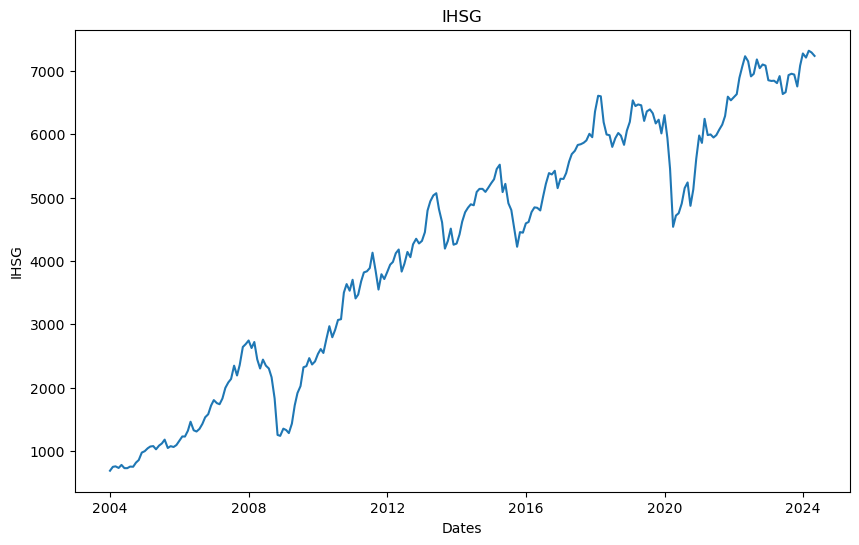

In [10]:
# plot ihsg data
plt.figure(figsize=(10, 6))
plt.plot(df1_imputed['dates'], df1_imputed['ihsg'])
plt.title('IHSG')
plt.xlabel('Dates')
plt.ylabel('IHSG')
plt.show()


In [11]:
# Making all columns (expcept col 1 and 2 ) to be t-1 thats make the model to predict the next day
for i in range(2, df1_imputed.shape[1]):
    df1_imputed.iloc[:, i] = df1_imputed.iloc[:, i].shift(1)

# Drop NaN
df1_imputed = df1_imputed.dropna()
df1_imputed

,dates,ihsg,dow_jones_industrial_index,emas_(xau/usd),minyak_sawit_(crude_palm_oil),nilai_tukar_rupiah_terhadap_usd_(usd/idr),suku_bunga_acuan_bank_sentral_us_fed_fund_rate,yield_sun_10y,credit_default_swap_sun_5y,dollar_index_(dxy),cadangan_devisa_indonesia_(milyar_usd),trade_balance_indonesia_(juta_usd),inflasi_indonesia,inflasi_us
243,2004-01-30,752.932,10453.92,415.05,1781.0,8420.0,1.0,11.878,320.8335,86.920,36.2957,2340.1,5.06,1.9
242,2004-02-27,761.081,10488.07,401.20,1806.0,8457.0,1.0,12.734,320.8335,87.200,35.9754,1700.2,4.82,1.9
241,2004-03-31,735.677,10583.92,397.00,1960.0,8453.0,1.0,11.790,366.6670,87.310,36.0007,1518.3,4.60,1.7
240,2004-04-30,783.413,10357.70,425.10,1980.0,8564.0,1.0,11.548,366.6670,87.610,37.4192,1617.2,5.11,1.7
239,2004-05-31,732.516,10225.57,389.30,1974.0,8705.0,1.0,10.878,320.8335,90.480,37.0807,1725.4,5.92,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-12-29,7272.797,35950.89,2037.07,3754.0,15510.0,5.5,6.606,75.3170,103.497,138.1001,2411.7,2.86,3.1
3,2024-01-31,7207.941,37689.54,2062.98,3662.0,15399.0,5.5,6.454,71.9950,101.333,146.3838,3285.0,2.61,3.4
2,2024-02-29,7316.111,38150.30,2049.69,3814.0,15783.0,5.5,6.572,74.4020,103.274,145.0516,1999.6,2.57,3.1
1,2024-03-29,7288.813,38996.39,2045.74,4025.0,15719.0,5.5,6.593,71.1400,104.156,144.0400,833.5,2.75,3.2


# ML Model

## Splitting the data into training and testing sets (80% training, 20% testing)

In [12]:
# Splitting data time series
X = df1_imputed.iloc[:, 2:]
y = df1_imputed['ihsg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, shuffle=False)

## RandomForestRegressor

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# Simplified hyperparameter grid for regression
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [10, 50, 100],  # Maximum number of levels in tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# Create the base model to tune
rf = RandomForestRegressor()

# Grid search of parameters, using 3-fold cross-validation
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit the grid search model
rf_grid.fit(X_train, y_train)

# Get the best parameters
best_params = rf_grid.best_params_
print(best_params)


Fitting 3 folds for each of 144 candidates, totalling 432 fits


c:\Users\derik\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'bootstrap': True, 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [16]:
# Eval with data test best params
rf = RandomForestRegressor(**best_params)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)


c:\Users\derik\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


1312.819083324626


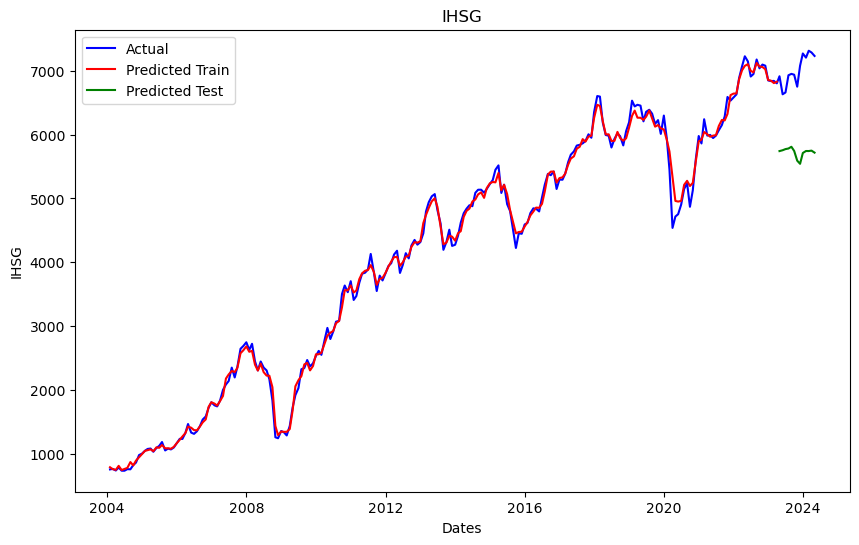

In [17]:
# Membuat prediksi
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Membuat array tanggal yang sesuai
dates_train = df1_imputed['dates'].iloc[:len(y_pred_train)]
dates_test = df1_imputed['dates'].iloc[len(y_pred_train):]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df1_imputed['dates'], df1_imputed['ihsg'], color='blue', label='Actual')
plt.plot(dates_train, y_pred_train, color='red', label='Predicted Train')
plt.plot(dates_test, y_pred_test, color='green', label='Predicted Test')
plt.title('IHSG')
plt.xlabel('Dates')
plt.ylabel('IHSG')
plt.legend()
plt.show()

## Neural Network

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer: No activation function as it is a regression problem
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Fit the model
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1)

# Predictions
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')



Epoch 1/100

6/6 [==============================] - 1s 35ms/step - loss: 15569706.0000 - val_loss: 38879116.0000
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 15564853.0000 - val_loss: 38868304.0000
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 15558450.0000 - val_loss: 38854552.0000
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 15549476.0000 - val_loss: 38835096.0000
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 15536366.0000 - val_loss: 38807780.0000
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 15516979.0000 - val_loss: 38768852.0000
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 15490055.0000 - val_loss: 38713560.0000
Epoch 8/100
6/6 [==============================] - 0s 8ms/step - loss: 15449220.0000 - val_loss: 38638560.0000
Epoch 9/100
6/6 [==============================] - 0s 6ms/step - loss: 15392733.0000 - val_loss: 38532968.000

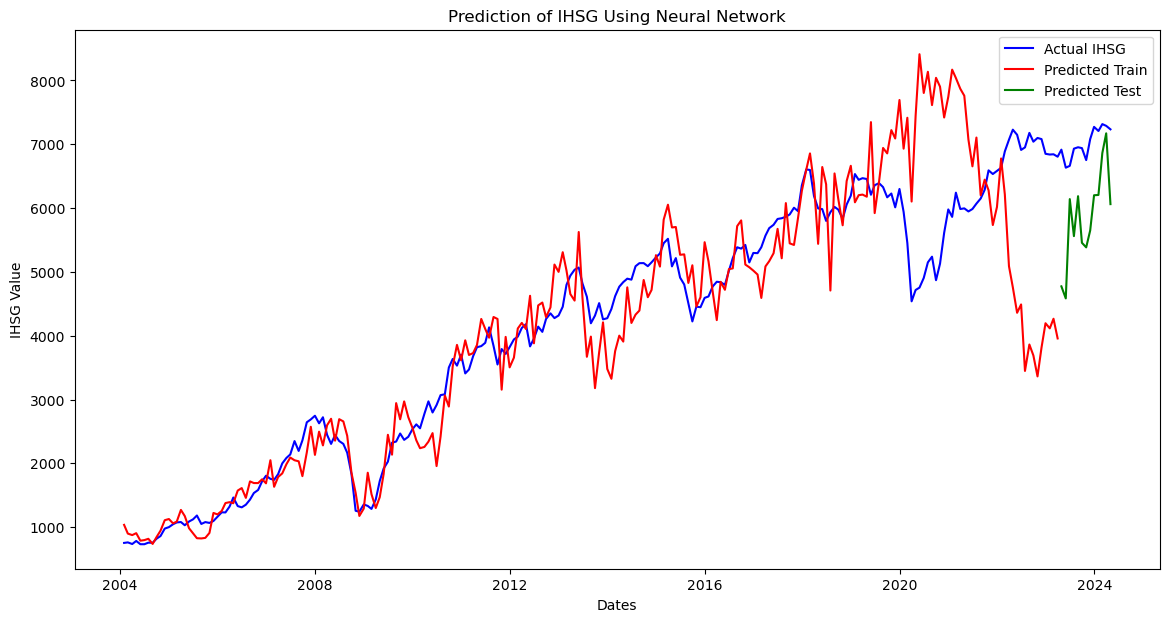

In [19]:
# Plotting predictions and actual data
dates_train = df1_imputed['dates'].iloc[:len(y_pred_train)].values
dates_test = df1_imputed['dates'].iloc[len(y_pred_train):].values

plt.figure(figsize=(14, 7))
plt.plot(df1_imputed['dates'], df1_imputed['ihsg'], color='blue', label='Actual IHSG')
plt.plot(dates_train, y_pred_train, color='red', label='Predicted Train')
plt.plot(dates_test, y_pred_test, color='green', label='Predicted Test')
plt.title('Prediction of IHSG Using Neural Network')
plt.xlabel('Dates')
plt.ylabel('IHSG Value')
plt.legend()
plt.show()

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Fit the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')


Epoch 1/100
6/6 [==============================] - 1s 25ms/step - loss: 11906374.0000 - val_loss: 4417127.0000
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 1363381.7500 - val_loss: 2650287.2500
Epoch 3/100
6/6 [==============================] - 0s 10ms/step - loss: 1393432.3750 - val_loss: 3860169.5000
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 1054440.1250 - val_loss: 819536.3125
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 913198.5000 - val_loss: 534466.0625
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 818998.6250 - val_loss: 1330050.7500
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 732213.5000 - val_loss: 1840906.2500
Epoch 8/100
6/6 [==============================] - 0s 9ms/step - loss: 665256.0625 - val_loss: 1508604.3750
Epoch 9/100
6/6 [==============================] - 0s 5ms/step - loss: 623734.6250 - val_loss: 1958791.8750
Epoch 10/100
6/6 [=====

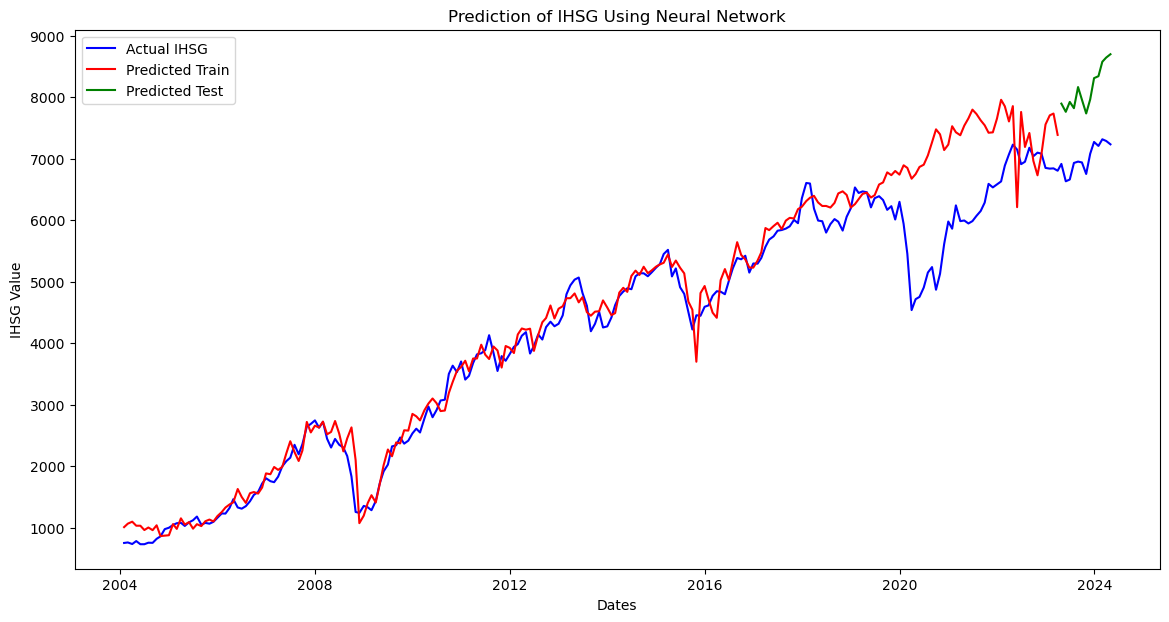

In [21]:
# Plotting predictions and actual data
dates_train = df1_imputed['dates'].iloc[:len(y_pred_train)].values
dates_test = df1_imputed['dates'].iloc[len(y_pred_train):].values

plt.figure(figsize=(14, 7))
plt.plot(df1_imputed['dates'], df1_imputed['ihsg'], color='blue', label='Actual IHSG')
plt.plot(dates_train, y_pred_train, color='red', label='Predicted Train')
plt.plot(dates_test, y_pred_test, color='green', label='Predicted Test')
plt.title('Prediction of IHSG Using Neural Network')
plt.xlabel('Dates')
plt.ylabel('IHSG Value')
plt.legend()
plt.show()

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU

# Neural network model
model = Sequential([
    Dense(256, input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.2),
    
    Dense(128),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.2),
    
    Dense(64),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.2),
    
    Dense(32),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.2),
    
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


# Fit the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')



Epoch 1/100
6/6 [==============================] - 2s 44ms/step - loss: 15566808.0000 - val_loss: 38120268.0000
Epoch 2/100
6/6 [==============================] - 0s 11ms/step - loss: 15562127.0000 - val_loss: 37947652.0000
Epoch 3/100
6/6 [==============================] - 0s 10ms/step - loss: 15559480.0000 - val_loss: 37888748.0000
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 15557064.0000 - val_loss: 37887920.0000
Epoch 5/100
6/6 [==============================] - 0s 10ms/step - loss: 15556135.0000 - val_loss: 37896932.0000
Epoch 6/100
6/6 [==============================] - 0s 10ms/step - loss: 15554482.0000 - val_loss: 37922820.0000
Epoch 7/100
6/6 [==============================] - 0s 10ms/step - loss: 15554138.0000 - val_loss: 37953948.0000
Epoch 8/100
6/6 [==============================] - 0s 10ms/step - loss: 15552292.0000 - val_loss: 37983800.0000
Epoch 9/100
6/6 [==============================] - 0s 7ms/step - loss: 15551206.0000 - val_loss: 380389

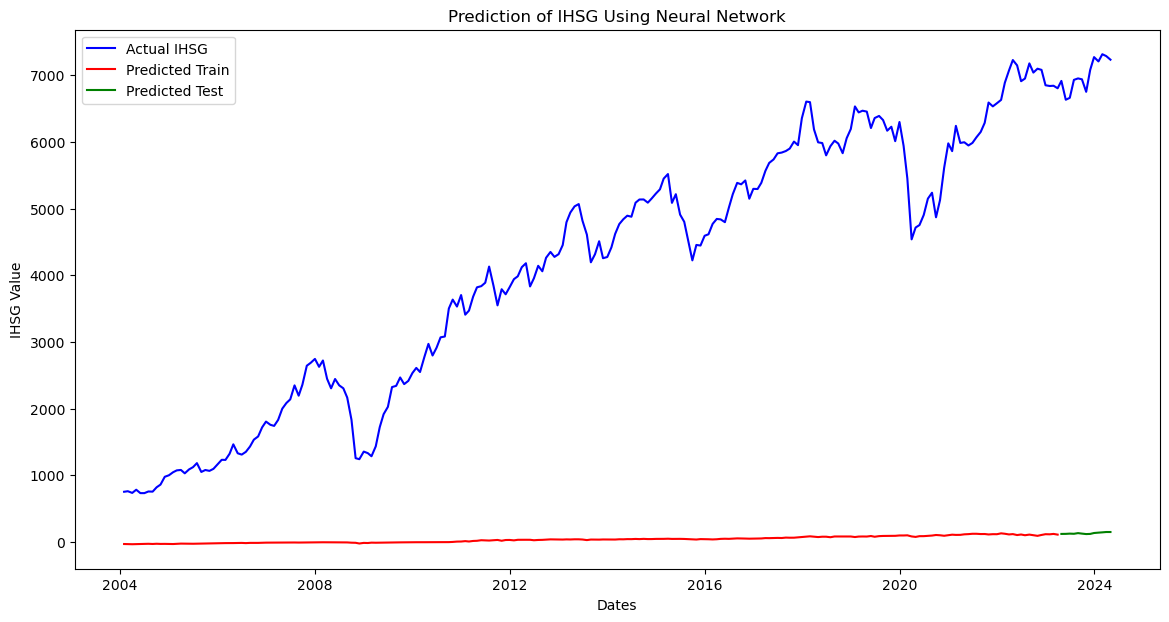

In [23]:
# Plotting predictions and actual data
dates_train = df1_imputed['dates'].iloc[:len(y_pred_train)].values
dates_test = df1_imputed['dates'].iloc[len(y_pred_train):].values

plt.figure(figsize=(14, 7))
plt.plot(df1_imputed['dates'], df1_imputed['ihsg'], color='blue', label='Actual IHSG')
plt.plot(dates_train, y_pred_train, color='red', label='Predicted Train')
plt.plot(dates_test, y_pred_test, color='green', label='Predicted Test')
plt.title('Prediction of IHSG Using Neural Network')
plt.xlabel('Dates')
plt.ylabel('IHSG Value')
plt.legend()
plt.show()

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Fit the model
history = model.fit(X, y, epochs=100, validation_split=0.2, verbose=1)
model.save('multivar_model.h5')



Epoch 1/100

7/7 [==============================] - 1s 18ms/step - loss: 13509207.0000 - val_loss: 2926494.0000
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 3503975.5000 - val_loss: 10855625.0000
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 1358071.7500 - val_loss: 266432.5625
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 1367447.5000 - val_loss: 1011556.0625
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 826620.8750 - val_loss: 4781009.0000
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 859910.3750 - val_loss: 2677020.5000
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 692190.0000 - val_loss: 1273323.1250
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 623285.1250 - val_loss: 3284458.0000
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 625522.3750 - val_loss: 2457827.0000
Epoch 10/100
7/7 [=

c:\Users\derik\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 0s 857us/step


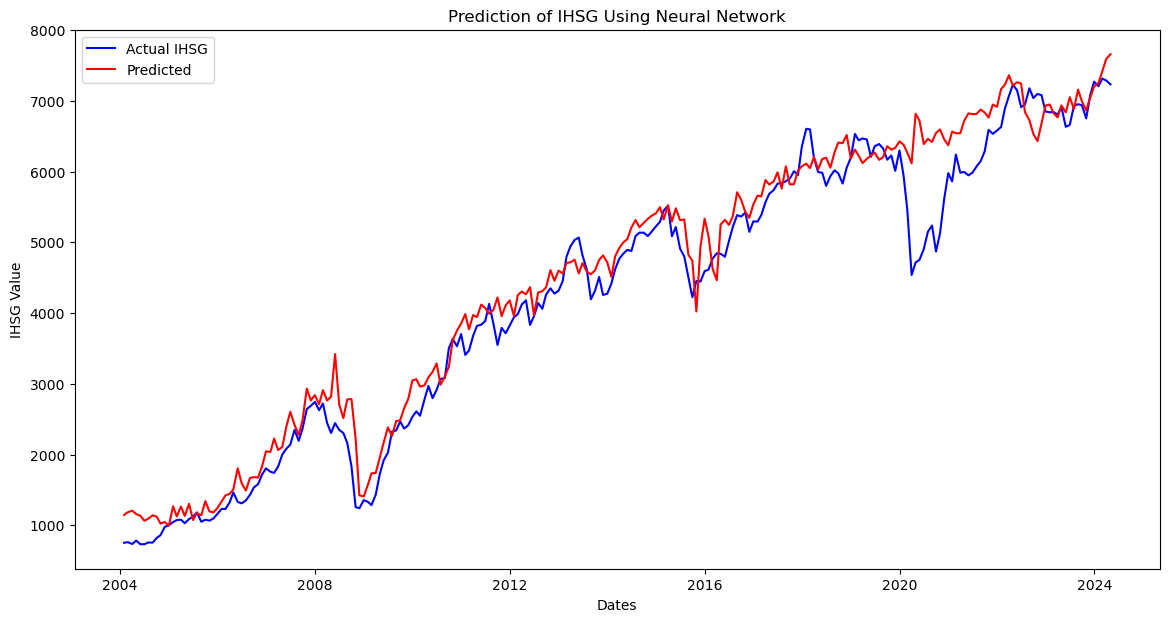

In [15]:
y_pred = model.predict(X)

plt.figure(figsize=(14, 7))
plt.plot(df1_imputed['dates'], df1_imputed['ihsg'], color='blue', label='Actual IHSG')
plt.plot(df1_imputed['dates'], y_pred, color='red', label='Predicted')
plt.title('Prediction of IHSG Using Neural Network')
plt.xlabel('Dates')
plt.ylabel('IHSG Value')
plt.legend()
plt.show()

In [17]:
X.columns

Index(['dow_jones_industrial_index', 'emas_(xau/usd)',
       'minyak_sawit_(crude_palm_oil)',
       'nilai_tukar_rupiah_terhadap_usd_(usd/idr)',
       'suku_bunga_acuan_bank_sentral_us_fed_fund_rate', 'yield_sun_10y',
       'credit_default_swap_sun_5y', 'dollar_index_(dxy)',
       'cadangan_devisa_indonesia_(milyar_usd)',
       'trade_balance_indonesia_(juta_usd)', 'inflasi_indonesia',
       'inflasi_us'],
      dtype='object')